In [52]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import glob
from radioReduction import *
from astropy.stats import LombScargle
from scipy import optimize
from scipy.interpolate import make_interp_spline, BSpline




In [76]:
mjd = []
flux = []
err = []

files = glob.glob('1314/daily/dataTables/*-LLRR.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

dt = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
dt = dt.sort_values('mjd')

In [112]:
files = sorted(files)

flux = []
err = []
mjd = []

for i in files:
    x = pd.read_table(i)
    xx = binning(x,30)
    flux.append(xx['re'])
    err.append(xx['ure'])
    mjd.append(xx['mjd'])
    

flux = np.array(flux)
err = np.array(err)
mjd = np.array(mjd)

flux = np.ndarray.flatten(flux)
err = np.ndarray.flatten(err)
mjd = np.ndarray.flatten(mjd)


/home/russell/projects/radio_project/radioReduction.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['secs'] = data['dtmin']*60


In [95]:
plt.figure(figsize=(11,7))
plt.errorbar(mjd,flux,yerr=err,color='k',linestyle='none',)

array([57589.07136208, 57589.07173824, 57589.07208546, 57589.07243269,
       57589.07277991, 57589.07411093, 57589.07445815, 57589.07480537,
       57589.07515259, 57589.07549981, 57589.07666687, 57589.07717806,
       57589.07752528, 57589.0778725 , 57589.07821972, 57589.07922281,
       57589.07989796, 57589.08024519, 57589.08059241, 57589.08093963,
       57589.08177875, 57589.08261787, 57589.08296509, 57589.08331231,
       57589.08365954, 57589.0843154 , 57589.08527991, 57589.08562713,
       57589.08597435, 57589.08632157, 57589.0866688 , 57590.01621162,
       57590.01661671, 57590.01702181, 57590.01739796, 57590.01807312,
       57590.0190762 , 57590.01942343, 57590.01977065, 57590.02011787,
       57590.02062906, 57590.02179611, 57590.02214333, 57590.02249056,
       57590.02283778, 57590.023185  , 57590.02445815, 57590.02480537,
       57590.02515259, 57590.02549981, 57590.02584704, 57590.02681154,
       57590.02746741, 57590.02781463, 57590.02816185, 57590.02850907,
      

In [4]:
dt.to_csv('1314/daily/daily_1314.csv')

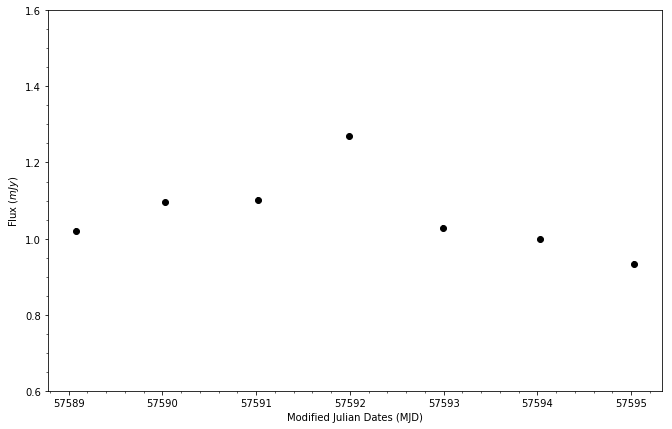

In [54]:
plt.figure(figsize=(11,7))
plt.errorbar(dt['mjd'],dt['re'],yerr=dt['ure'],color='k',fmt='o')
plt.xlabel('Modified Julian Dates (MJD)')
plt.ylabel('Flux ($mJy$)')
plt.minorticks_on()
plt.ylim(0.6,1.6)
plt.savefig('plots/1314Daily.png')
plt.show()


In [8]:
'''
Fitting a mean value and calculating a reduced chi^2
'''

reduced_chi = np.sum(np.square((dt['re']-dt['re'].mean()))/(dt['ure'])**2)/(dt.shape[0]-1)

print(reduced_chi)

219.35249038966506


/home/russell/projects/radio_project/radioReduction.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['secs'] = data['dtmin']*60


1
2
3
4
5
6
7
Stats for 10 
             mjd  reduced_chi       rms
0  57589.079075     1.006686  0.006560
1  57590.023943     1.353123  0.007779
2  57591.022273     1.640632  0.008926
3  57591.992823     1.633694  0.008848
4  57592.993537     1.339912  0.008701
5  57594.032219     1.059642  0.006795
6  57595.031712     1.635937  0.011389


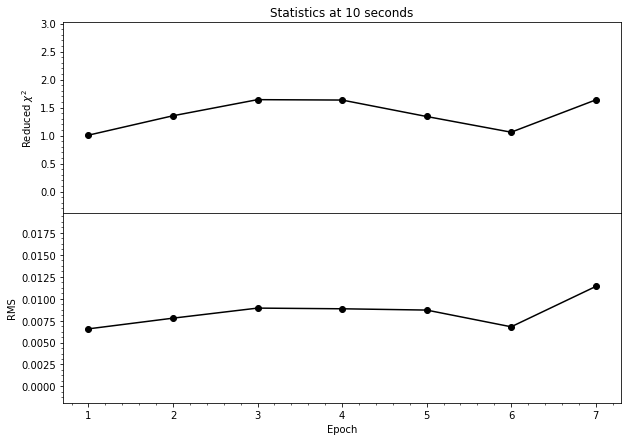

1
2
3
4
5
6
7
Stats for 15 
             mjd  reduced_chi       rms
0  57589.079075     1.089785  0.006824
1  57590.023902     1.656030  0.008617
2  57591.022232     1.952509  0.009684
3  57591.992906     2.322924  0.010559
4  57592.993619     1.462014  0.009052
5  57594.032177     1.176258  0.007161
6  57595.031795     2.043830  0.012741


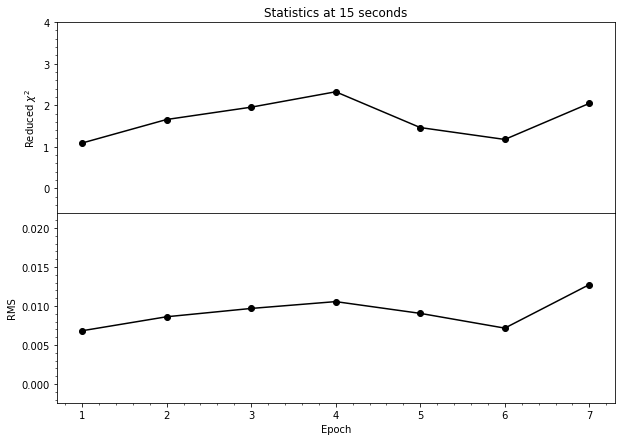

1
2
3
4
5
6
7
Stats for 30 
             mjd  reduced_chi       rms
0  57589.079074     1.127552  0.006895
1  57590.024019     1.509533  0.008130
2  57591.022348     2.720656  0.011075
3  57591.992904     3.703476  0.013273
4  57592.993617     1.799821  0.009966
5  57594.032295     1.635805  0.008375
6  57595.031793     2.645928  0.014503


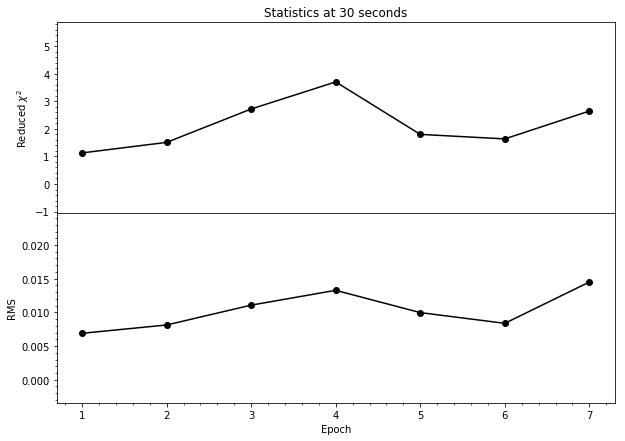

1
2
3
4
5
6
7
Stats for 45 
             mjd  reduced_chi       rms
0  57589.079235     1.188181  0.006969
1  57590.023902     1.560394  0.008233
2  57591.022232     3.396472  0.012498
3  57591.993035     4.595943  0.014518
4  57592.993746     2.271051  0.011221
5  57594.032177     1.850655  0.008839
6  57595.031923     3.161513  0.015705


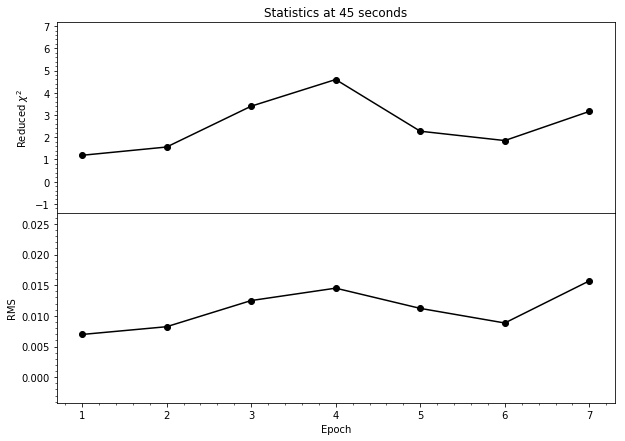

1
2
3
4
5
6
7
Stats for 60 
             mjd  reduced_chi       rms
0  57589.079200     0.761554  0.005597
1  57590.024059     2.144636  0.009561
2  57591.022388     4.387285  0.013933
3  57591.992987     6.265916  0.016889
4  57592.993699     2.585610  0.011967
5  57594.032334     1.930849  0.008924
6  57595.031876     2.194566  0.012416


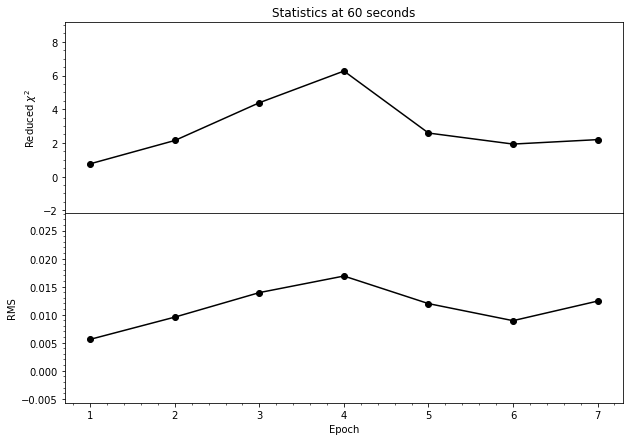

1
2
3
4
5
6
7
Stats for 90 
             mjd  reduced_chi       rms
0  57589.079126     1.050227  0.006359
1  57590.023940     2.317297  0.009734
2  57591.022271     6.443049  0.016677
3  57591.992893     7.060376  0.017576
4  57592.993606     3.764794  0.014166
5  57594.032216     2.778266  0.010532
6  57595.031782     3.872002  0.016404


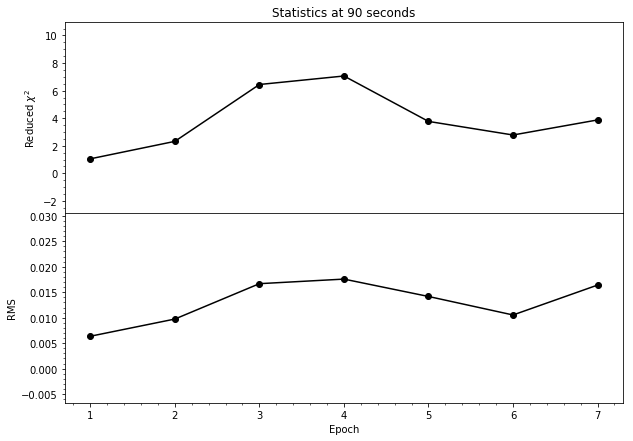

1
2
3
4
5
6
7
Stats for 180 
             mjd  reduced_chi       rms
0  57589.079086     0.373392  0.003586
1  57590.023937     4.102303  0.012254
2  57591.022267    10.612936  0.020319
3  57591.992876    12.266097  0.021770
4  57592.993589     5.188381  0.015664
5  57594.032212     5.043028  0.013350
6  57595.031765     2.780026  0.012279


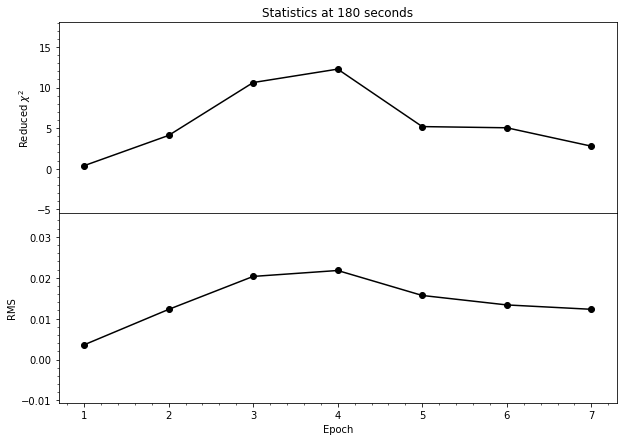

1
2
3
4
5
6
7
Stats for 210 
             mjd  reduced_chi       rms
0  57589.079066     1.253075  0.006367
1  57590.023935     5.121991  0.013172
2  57591.022265    14.353822  0.022821
3  57591.992823    16.518813  0.024479
4  57592.993537     4.703033  0.014322
5  57594.032210     4.451157  0.012131
6  57595.031712     6.247180  0.018349


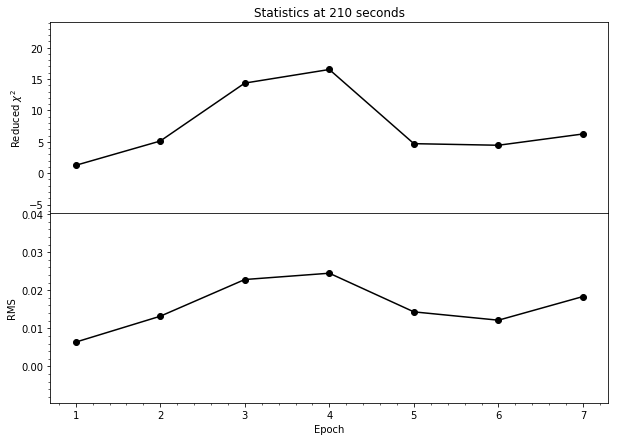

In [68]:
dt = sorted(glob.glob('1314/daily/dataTables/*-LLRR.dat'))
dtLow = sorted(glob.glob('1314/daily/dataTables/*-5GHz.dat'))
dtHigh = sorted(glob.glob('1314/daily/dataTables/*-7GHz.dat'))

x = []
y = []
z = []



for i in range(len(dt)):
    x.append(pd.read_table(dt[i]))
    y.append(pd.read_table(dtLow[i]))
    z.append(pd.read_table(dtHigh[i]))
    
binningTime = [10,15,30,45,60,90,180,210]

for s in binningTime:
    mjd = []
    rms = []
    reduced_chi = []
    q = 0 # Will be used to grab the epoch
    for a in range(len(x)):
        i = x[a][x[a]['nsamp']>1500]
        j = y[a][y[a]['nsamp']>1000]
        k = z[a][z[a]['nsamp']>1000]
        
        # Binning the datatable
        day = int(i['mjd'].mean())
        if (day == 57682 or day == 57704 or day == 57771):
            print(day)
            ii = binning(i,s,binning=2)
            jj = binning(j,s,binning=2)
            kk = binning(k,s,binning=2)
        else:
            ii = binning(i,s)
            jj = binning(j,s)
            kk = binning(k,s)
            
        # Calculating RMS and Reduced Chi
        mjd.append(ii['mjd'].mean())
        rms.append(np.sqrt(np.sum((ii['re']-ii['re'].mean())**2))/ii.shape[0])
        reduced_chi.append(np.sum(np.square((ii['re']-ii['re'].mean())/ii['ure']))/(ii.shape[0]-1))
        
        # Grabbing Epoch Number
        epochNumber = dt[q]
        epochNumber = epochNumber.replace('1314/daily/dataTables/2M1314de','')
        epochNumber = epochNumber.replace('-LLRR.dat','')
        print(epochNumber)
    
        # Making a plot of each epoch at the binning time
        plt.figure(figsize=(11,7))
        plt.errorbar(ii['dtmin'],ii['re'],yerr=ii['ure'],linestyle='None',fmt='o',color='k')
        plt.xlabel('Time (minutes)')
        plt.ylabel('Flux ($mJy$)')
        plt.minorticks_on()
        plt.title('Epoch %s binned at %s seconds'%(epochNumber,s))
        plt.ylim(ii['re'].min()-0.2,ii['re'].max()+0.2)
        plt.savefig('1314/plots/daily/%ssecs/e%s_%s.png'%(s,epochNumber,s),bbox_inches='tight')
        plt.close()
        
        # Making a plot of the spectral energy distribution
        plt.figure(figsize=(11,7))
        plt.errorbar(jj['dtmin'],jj['re'],yerr=jj['ure'],linestyle='None',fmt='o',color='darkgreen',label='5 GHz')
        plt.errorbar(kk['dtmin'],kk['re'],yerr=kk['ure'],linestyle='None',fmt='o',color='darkorange',label='7 GHz')
        plt.xlabel('Time (minutes)')
        plt.ylabel('Flux ($mJy$)')
        plt.minorticks_on()
        plt.title('Epoch %s Spectral Energy Distribution binned at %s seconds'%(epochNumber,s))
        plt.ylim(kk['re'].min()-0.2*kk['re'].min(),ii['re'].max()+0.5*ii['re'].max())
        plt.savefig('1314/plots/daily/%ssecs/e%sSED_%s.png'%(s,epochNumber,s),bbox_inches='tight')
        plt.close()

        
        
        q = q + 1
    # Putting everything into a pandas table    
    mjd = np.array(mjd)
    rms = np.array(rms)
    reduced_chi = np.array(reduced_chi)

    stats = pd.DataFrame(data={'mjd':mjd,'reduced_chi':reduced_chi,'rms':rms})
    stats = stats.sort_values('mjd')
    stats = stats.reset_index(drop=True)
    
    # Plotting the statistics
    fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(10,7),gridspec_kw = {'hspace':0})
    ax[0].plot(stats.index,stats['reduced_chi'],color='k',marker='o')
    ax[0].set_ylabel('Reduced $\chi^2$')
    ax[0].set_title('Statistics at %s seconds'%s)
    ax[0].set_ylim(np.amin(stats['reduced_chi'])-np.mean(stats['reduced_chi']),np.amax(stats['reduced_chi'])+np.mean(stats['reduced_chi']))
    ax[0].minorticks_on()
    
    ax[1].plot(stats.index,stats['rms'],color='k',marker='o')
    ax[1].set_ylabel('RMS')
    ax[1].set_ylim(np.amin(stats['rms'])-np.mean(stats['rms']),np.amax(stats['rms'])+np.mean(stats['rms']))
    ax[1].minorticks_on()
    
    print('Stats for %s \n'%s,stats)
    pos = np.arange(7)
    labels = pos + 1

    plt.xticks(pos,labels)
    plt.xlabel('Epoch')
    plt.savefig('1314/plots/daily/stats_%s.png'%s)
    plt.show()
    plt.close()
    
    stats.to_csv('1314/plots/daily/%sseconds_Stats.csv'%s,sep=' ',index=False)



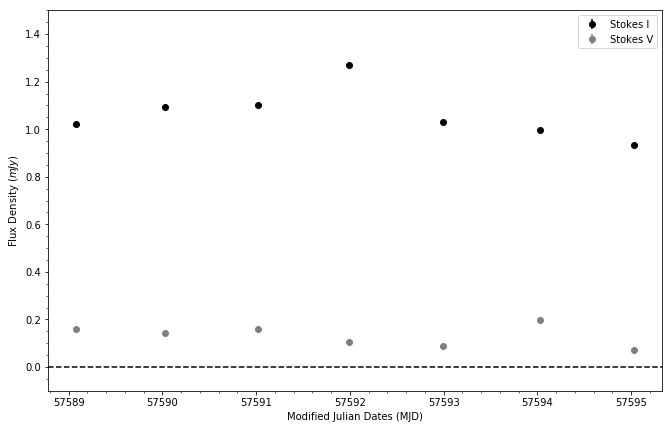

12.470462306557

In [55]:
# The 7 GHz band
mjd = []
flux = []
err = []

files = glob.glob('1314/daily/dataTables/*-LL.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

ll = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
ll = ll.sort_values(by=['mjd']).reset_index()

# The 5 GHz Band
mjd = []
flux = []
err = []

files = glob.glob('1314/daily/dataTables/*-RR.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

rr = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
rr = rr.sort_values(by=['mjd']).reset_index()

stV = (rr['re']-ll['re'])*0.5
stI = (rr['re']+ll['re'])*0.5
stErr = np.sqrt(rr['ure']**2+ll['ure']**2)*.5


plt.figure(figsize=(11,7))
plt.errorbar(rr['mjd'],stI,yerr=stErr,fmt='o',color='black',label='Stokes I')
plt.errorbar(rr['mjd'],stV,yerr=stErr,fmt='o',color='gray',label='Stokes V')
plt.ylabel('Flux Density ($mJy$)')
plt.legend(loc='best')
plt.axhline(y=0,color='k',linestyle='dashed')
plt.minorticks_on()
plt.ylim(-0.1,1.5)

plt.xlabel('Modified Julian Dates (MJD)')
plt.savefig('plots/1314Daily.png')
plt.show()

np.mean((stV/stI)*100)

In [47]:
print(np.min(stV),np.max(stV))

0.06993080044751626 0.1979862321875248


In [46]:
'''
Chi2 calculation
'''

chi2 = np.sum((stI-np.mean(stI))**2/(stErr**2))/(len(stI)-1)
print(chi2)

chi2 = np.sum((stV-np.mean(stV))**2/(stErr**2))/(len(stV)-1)
print(chi2)
print(np.mean(stV))



219.10500031828641
40.10013116047795
0.13180233488537726


#### 

In [75]:
low

,mjd,re,ure
3,57589.079033,0.980484,0.009911
0,57590.023902,1.116296,0.010224
2,57591.022232,1.117612,0.010417
4,57591.992823,1.315853,0.010464
5,57592.993537,1.041388,0.011689
6,57594.032177,1.023497,0.010055
1,57595.031712,0.938529,0.012163


In [72]:
mjd = []
flux = []
err = []

files = glob.glob('1314/daily/dataTables/*-7GHz.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

high = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
high = high.sort_values('mjd')


mjd = []
flux = []
err = []

files = glob.glob('1314/daily/dataTables/*-5GHz.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

low = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
low = low.sort_values('mjd')

mjd = []
flux = []
err = []


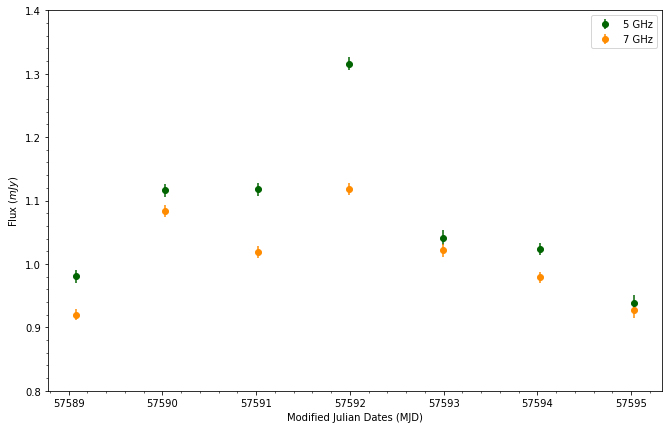

In [73]:
plt.figure(figsize=(11,7))
plt.errorbar(low['mjd'],low['re'],yerr=low['ure'],fmt='o',color='darkgreen',label='5 GHz')
plt.errorbar(high['mjd'],high['re'],yerr=high['ure'],fmt='o',color='darkorange',label='7 GHz')
plt.xlabel('Modified Julian Dates (MJD)')
plt.legend(loc='best')
plt.ylabel('Flux ($mJy$)')
plt.minorticks_on()
plt.ylim(0.8,1.4)
plt.savefig('plots/1314DailySed.png')
plt.show()

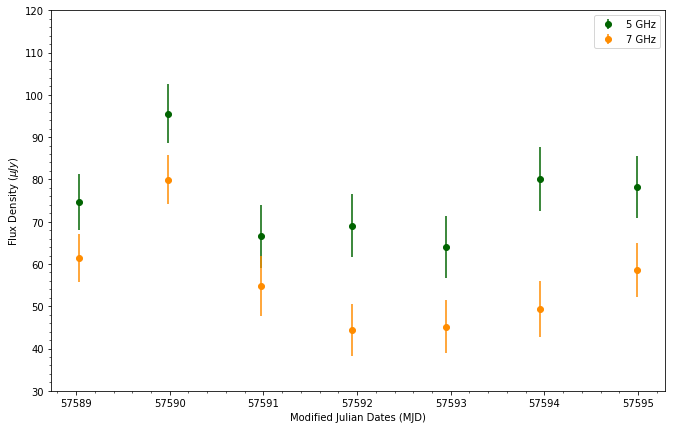

In [51]:
# The 7 GHz band
mjd = []
flux = []
err = []

files = glob.glob('1315/daily/*-7GHz.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

high = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
high = high.sort_values(by=['mjd'])

# The 5 GHz Band
mjd = []
flux = []
err = []

files = glob.glob('1315/daily/*-5GHz.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

low = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
low = low.sort_values(by=['mjd'])

plt.figure(figsize=(11,7))
plt.errorbar(low['mjd'],low['re'],yerr=low['ure'],fmt='o',color='darkgreen',label='5 GHz')
plt.errorbar(high['mjd'],high['re'],yerr=high['ure'],fmt='o',color='darkorange',label='7 GHz')
plt.xlabel('Modified Julian Dates (MJD)')
plt.ylabel('Flux Density ($\mu Jy$)')
plt.legend(loc='best')
plt.minorticks_on()
plt.ylim(30,120)
#plt.plots('plots/1315Daily_sed.png')
plt.show()

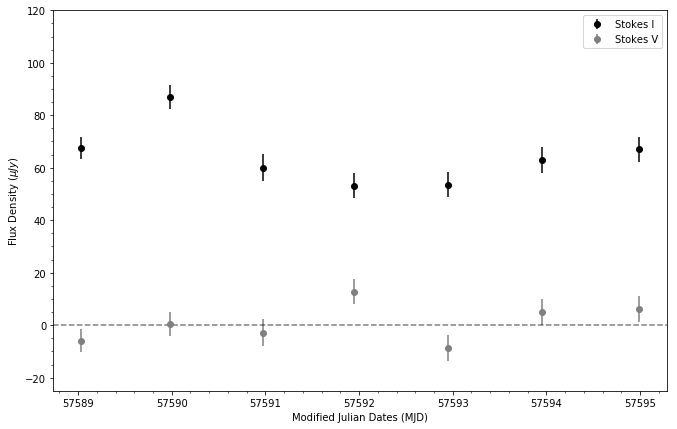

In [48]:
# The 7 GHz band
mjd = []
flux = []
err = []

files = glob.glob('1315/daily/*-LL.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

ll = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
ll = ll.sort_values(by=['mjd']).reset_index()

# The 5 GHz Band
mjd = []
flux = []
err = []

files = glob.glob('1315/daily/*-RR.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

rr = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
rr = rr.sort_values(by=['mjd']).reset_index()

stV = (rr['re']-ll['re'])*0.5
stI = (rr['re']+ll['re'])*0.5
stErr = np.sqrt(rr['ure']**2+ll['ure']**2)*.5


plt.figure(figsize=(11,7))
plt.errorbar(rr['mjd'],stI,yerr=stErr,fmt='o',color='black',label='Stokes I')
plt.errorbar(rr['mjd'],stV,yerr=stErr,fmt='o',color='gray',label='Stokes V')
plt.ylabel('Flux Density ($\mu Jy$)')
plt.legend(loc='best')
plt.axhline(y=0,color='k',linestyle='dashed',alpha=0.5)
plt.minorticks_on()
plt.ylim(-25,120)

plt.xlabel('Modified Julian Dates (MJD)')
plt.savefig('plots/1315Daily.png')
plt.show()

In [50]:
print(np.average(stV),1/np.sqrt(np.sum(1/stErr**2)))

1.028210722798465 1.798721134027529


In [44]:
'''
Reduced chi2 of flux measurements
'''

chi2 = np.sum((stI-np.mean(stI))**2/stErr**2)/(len(stI)-1)
print(chi2)

chi2 = np.sum((stV-np.mean(stV))**2/stErr**2)/(len(stV)-1)
print(chi2)

6.146710517727942
2.503808912437974


In [32]:
mjd = []
flux = []
err = []

files = glob.glob('1315/daily/dataTables/*-LLRR.dat')

for i in files:
    x = pd.read_table(i)
    m,f,e = meanData(x)
    mjd.append(m)
    flux.append(f)
    err.append(e)
    
mjd = np.array(mjd)
flux = np.array(flux)
err = np.array(err)

dt = pd.DataFrame(data={'mjd':mjd,'re':flux,'ure':err})
dt = dt.sort_values('mjd')
print(dt)

            mjd         re       ure
1  57589.032129  68.640423  4.341953
6  57589.980897  87.051961  4.534671
3  57590.978166  60.491693  5.122333
4  57591.951216  51.879143  4.754822
5  57592.952011  53.913983  4.815641
2  57593.948041  63.101036  5.011645
0  57594.990083  65.321263  4.862603


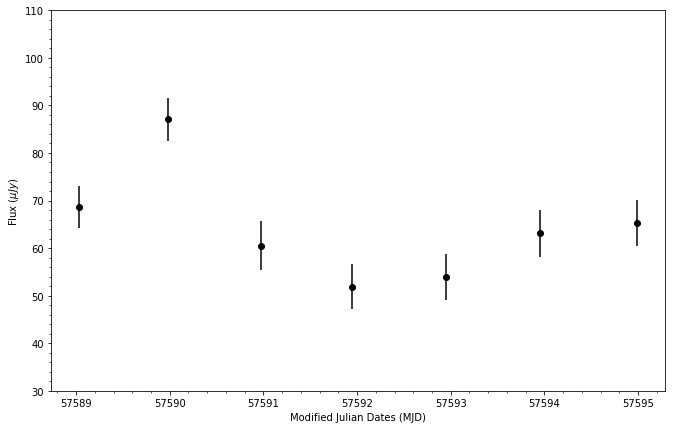

In [33]:
plt.figure(figsize=(11,7))
plt.errorbar(dt['mjd'],dt['re'],yerr=dt['ure'],color='k',fmt='o')
plt.ylim(30,110)
plt.xlabel('Modified Julian Dates (MJD)')
plt.ylabel('Flux ($\mu Jy$)')
plt.minorticks_on()
plt.savefig('plots/1315Daily.png')
plt.show()

In [34]:
'''
Fitting a mean value and calculating a reduced chi^2
'''

reduced_chi = np.sum(np.square((dt['re']-dt['re'].mean())/dt['ure']))/dt.shape[0]

print(reduced_chi)

5.469536963212979


In [35]:
dt['re'].mean()

64.34278600045263

/home/russell/projects/radio_project/radioReduction.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['secs'] = data['dtmin']*60


Stats for 30 
             mjd  reduced_chi       rms
0  57589.032334     1.450704  5.213775
1  57589.981023     0.831642  4.111022
2  57590.978292     0.862173  4.811694
3  57591.951382     0.934359  4.565703
4  57592.952095     1.320358  5.481522
5  57593.948207     0.940442  4.858045
6  57594.990249     0.965468  4.729324


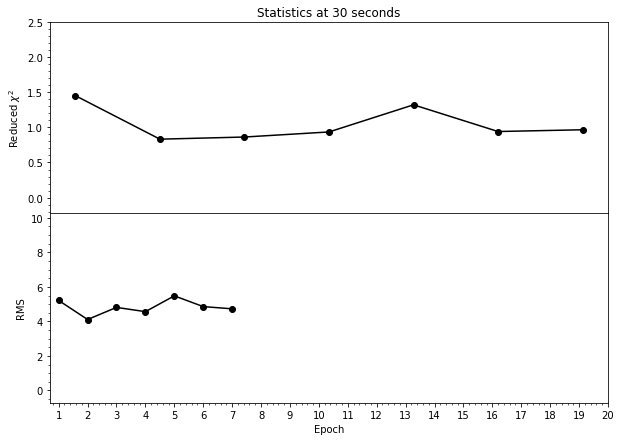

Stats for 60 
             mjd  reduced_chi       rms
0  57589.032321     1.516312  5.297396
1  57589.981019     0.907088  4.266998
2  57590.978288     0.819020  4.663783
3  57591.951374     1.037511  4.797722
4  57592.952094     1.078404  4.924521
5  57593.948198     0.867845  4.597017
6  57594.990241     1.116998  5.091916


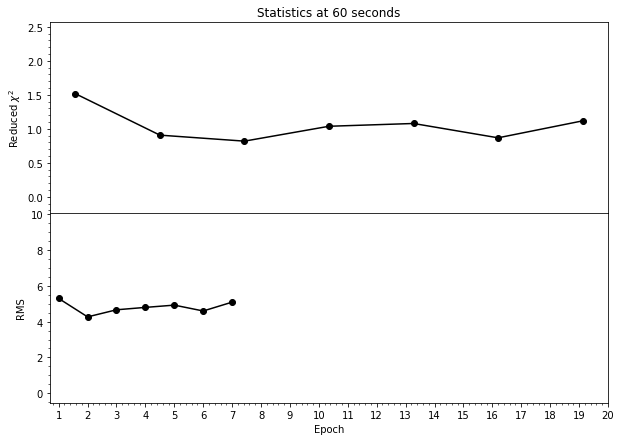

Stats for 120 
             mjd  reduced_chi       rms
0  57589.032295     2.086554  6.147397
1  57589.981010     1.043952  4.517189
2  57590.978279     0.861994  4.685397
3  57591.951358     1.102652  4.873392
4  57592.952090     1.212898  5.112843
5  57593.948182     0.884160  4.618909
6  57594.990224     1.102829  4.954475


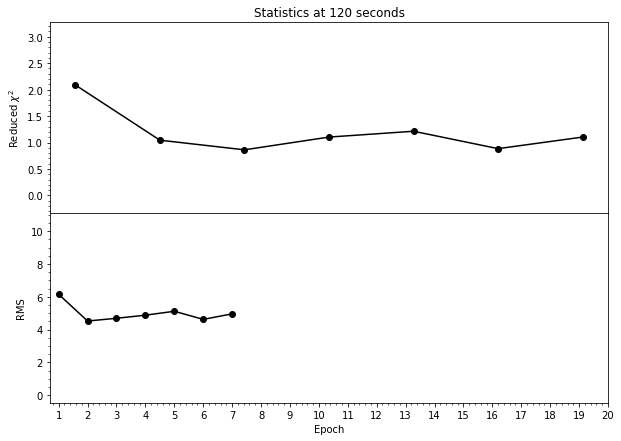

Stats for 180 
             mjd  reduced_chi       rms
0  57589.032269     2.499005  6.604911
1  57589.981000     1.135109  4.657100
2  57590.978269     0.844567  4.529543
3  57591.951341     1.068049  4.744640
4  57592.952086     1.478815  5.638844
5  57593.948165     0.940622  4.735322
6  57594.990208     0.695983  3.905302


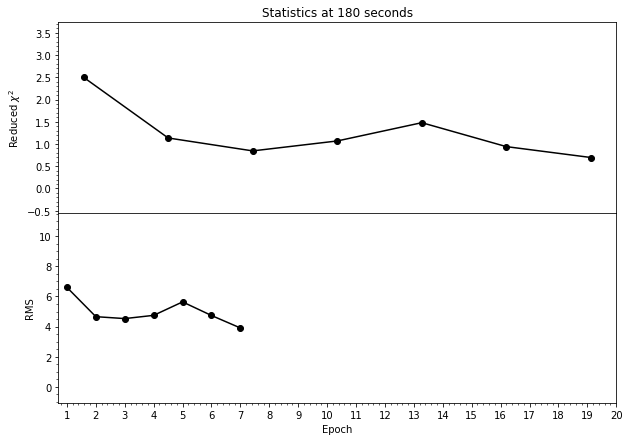

Stats for 210 
             mjd  reduced_chi       rms
0  57589.032256     2.614834  6.754726
1  57589.980996     0.479839  3.008472
2  57590.978265     0.480209  3.354974
3  57591.951332     1.409180  5.416112
4  57592.952084     1.987536  6.455143
5  57593.948157     1.267032  5.434797
6  57594.990199     0.984635  4.616504


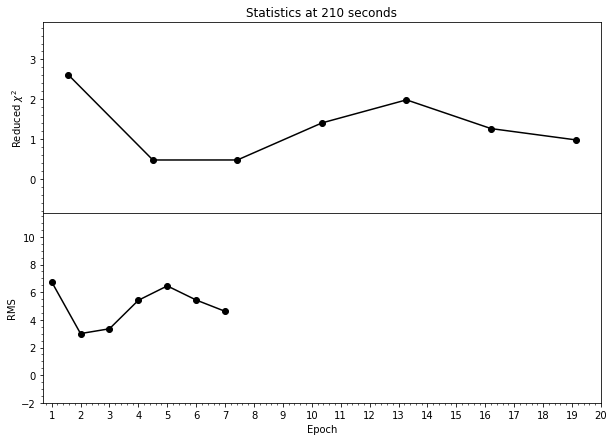

Stats for 240 
             mjd  reduced_chi       rms
0  57589.032168     2.611415  6.652294
1  57589.980989     0.554459  3.206499
2  57590.978258     0.721131  4.073432
3  57591.951286     1.074633  4.678689
4  57592.952116     1.756336  6.016997
5  57593.948110     1.451202  5.728042
6  57594.990153     0.559924  3.458551


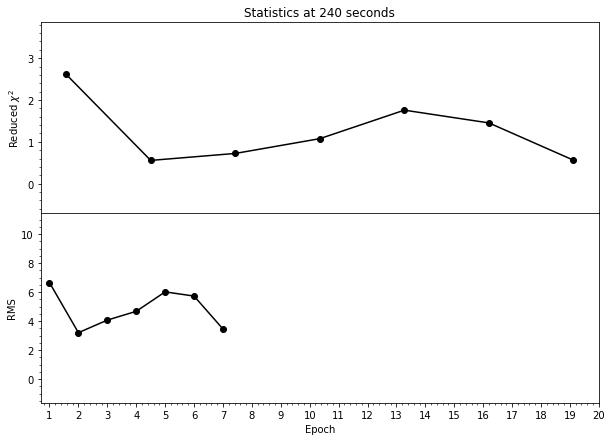

Stats for 270 
             mjd  reduced_chi       rms
0  57589.032226     2.928449  7.024411
1  57589.980985     0.655736  3.457498
2  57590.978254     0.621693  3.622637
3  57591.951313     1.622513  5.695627
4  57592.952079     1.905300  6.246583
5  57593.948137     1.820500  6.360302
6  57594.990180     1.173067  4.943741


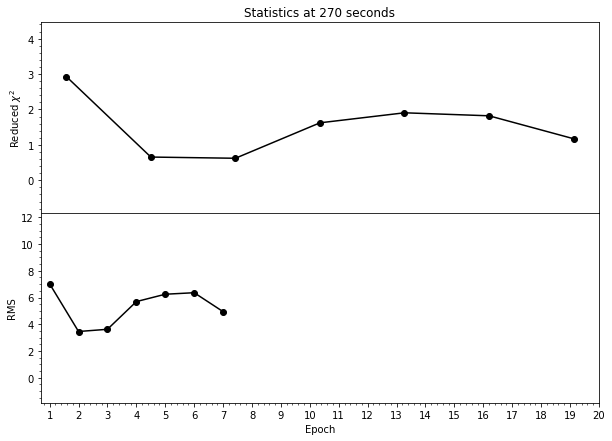

Stats for 300 
             mjd  reduced_chi       rms
0  57589.032210     2.653992  6.620363
1  57589.980979     0.739225  3.641683
2  57590.978248     0.960469  4.648668
3  57591.951303     0.902276  4.212368
4  57592.952076     2.644465  7.274377
5  57593.948128     0.703997  3.911263
6  57594.990170     0.726950  3.897547


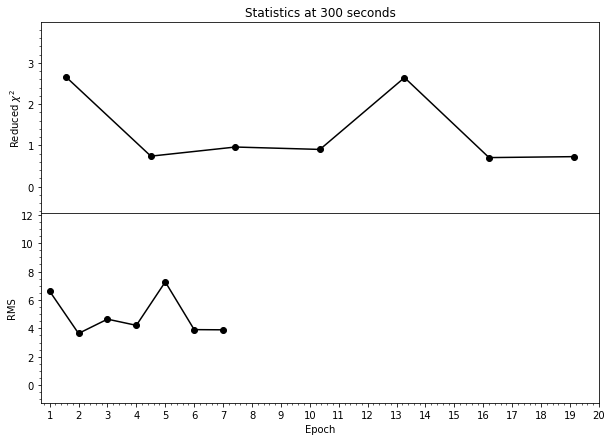

Stats for 330 
             mjd  reduced_chi       rms
0  57589.032191     2.994503  6.961167
1  57589.980972     0.632284  3.342435
2  57590.978241     1.444827  5.691490
3  57591.951291     0.648214  3.540414
4  57592.952073     1.729086  5.857016
5  57593.948115     0.824791  4.275967
6  57594.990158     0.825606  4.085050


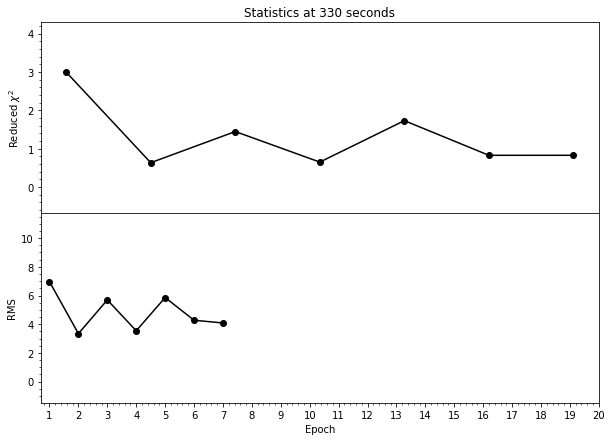

Stats for 360 
             mjd  reduced_chi       rms
0  57589.032191     2.994503  6.961167
1  57589.980972     0.632284  3.342435
2  57590.978241     1.444827  5.691490
3  57591.951291     0.648214  3.540414
4  57592.952073     1.729086  5.857016
5  57593.948115     0.824791  4.275967
6  57594.990158     0.825606  4.085050


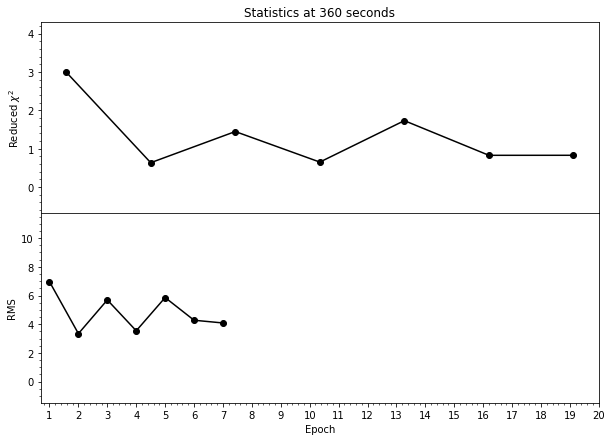

Stats for 390 
             mjd  reduced_chi       rms
0  57589.032165     4.353612  8.280434
1  57589.980963     0.649058  3.335374
2  57590.978232     0.536616  3.279383
3  57591.951274     1.655715  5.569772
4  57592.952069     2.316850  6.639890
5  57593.948099     1.887329  6.295584
6  57594.990141     0.644930  3.527122


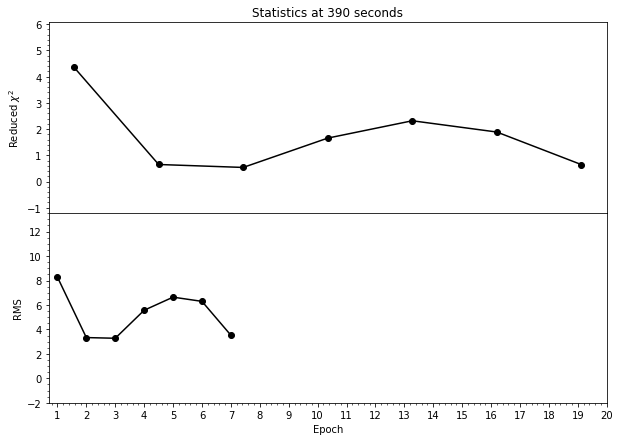

Stats for 420 
             mjd  reduced_chi       rms
0  57589.032165     4.353612  8.280434
1  57589.980963     0.649058  3.335374
2  57590.978232     0.536616  3.279383
3  57591.951274     1.655715  5.569772
4  57592.952069     2.316850  6.639890
5  57593.948099     1.887329  6.295584
6  57594.990141     0.644930  3.527122


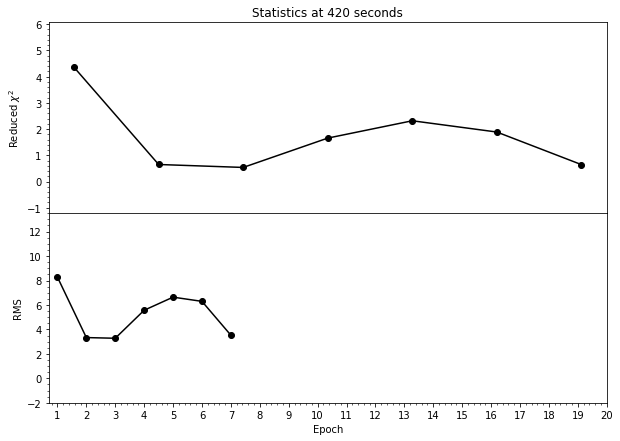

Stats for 450 
             mjd  reduced_chi       rms
0  57589.032164     3.918445  7.692579
1  57589.980950     0.876445  3.795869
2  57590.978219     0.620550  3.587321
3  57591.951268     0.626718  3.393148
4  57592.952046     2.378414  6.637313
5  57593.948093     1.412132  5.293292
6  57594.990135     0.138171  1.606344


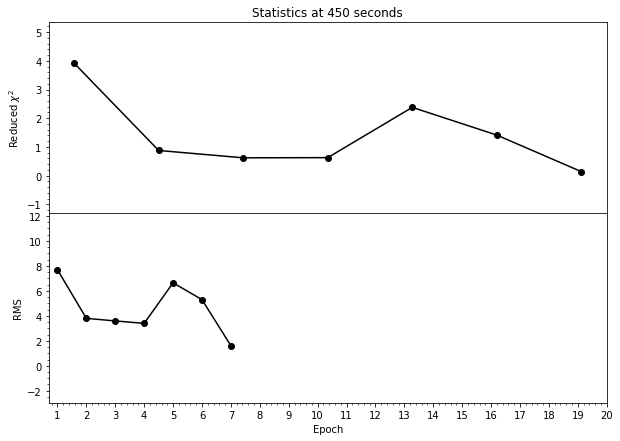

Stats for 480 
             mjd  reduced_chi       rms
0  57589.032164     3.918445  7.692579
1  57589.980950     0.876445  3.795869
2  57590.978219     0.620550  3.587321
3  57591.951268     0.626718  3.393148
4  57592.952046     2.378414  6.637313
5  57593.948093     1.412132  5.293292
6  57594.990135     0.138171  1.606344


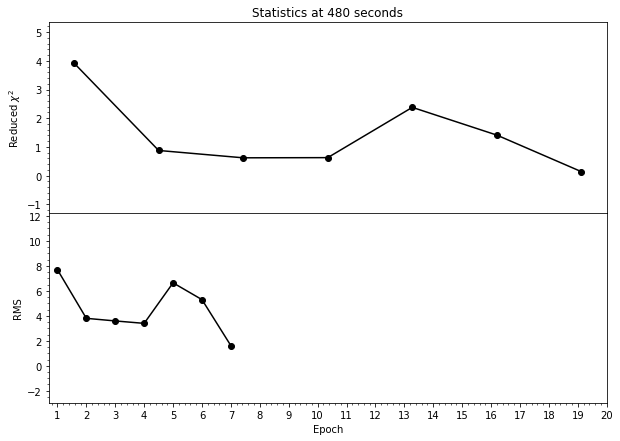

Stats for 510 
             mjd  reduced_chi       rms
0  57589.032161     3.321987  6.863286
1  57589.980930     0.982087  3.881699
2  57590.978199     0.392284  2.752715
3  57591.951216     1.125386  4.363214
4  57592.952054     3.514383  7.834088
5  57593.948041     1.239081  4.785125
6  57594.990083     0.724435  3.606697


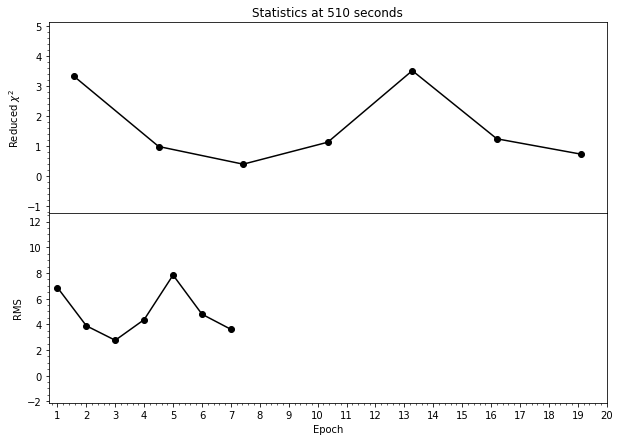

In [41]:
dt = sorted(glob.glob('1315/daily/dataTables/*-LLRR.dat'))
dtLow = sorted(glob.glob('1315/daily/dataTables/*-5GHz.dat'))
dtHigh = sorted(glob.glob('1315/daily/dataTables/*-7GHz.dat'))

ll = sorted(glob.glob('1315/daily/dataTables/*-LL.dat'))
rr = sorted(glob.glob('1315/daily/dataTables/*-RR.dat')) 

x = []
y = []
z = []
c = []
b = []



for i in range(len(dt)):
    x.append(pd.read_table(dt[i])) # stokes I
    y.append(pd.read_table(dtLow[i])) # stokes I 5 Ghz
    z.append(pd.read_table(dtHigh[i])) # stokes I 7 Ghz
    c.append(pd.read_table(ll[i])) # LL polarization
    b.append(pd.read_table(rr[i])) # RR polarization
    
    
binningTime = [30,60,120,180,210,240,270,300,330,360,390,420,450,480,510]

for s in binningTime:
    mjd = []
    rms = []
    reduced_chi = []
    q = 0 # Will be used to grab the epoch
    for a in range(len(x)):
        i = x[a][x[a]['nsamp']>1500]
        j = y[a][y[a]['nsamp']>1000]
        k = z[a][z[a]['nsamp']>1000]
        l = c[a][c[a]['nsamp']>1000]
        r = b[a][b[a]['nsamp']>1000]

        # Binning the datatable 57772,57704,57683
        day = int(i['mjd'].mean())
        if (day == 57683 or day == 57704 or day == 57772):
            ii = binning(i,s,binning=2)
            jj = binning(j,s,binning=2)
            kk = binning(k,s,binning=2)
            LL = binning(l,s,binning=2)
            RR = binning(r,s,binning=2)
        else:
            ii = binning(i,s)
            jj = binning(j,s)
            kk = binning(k,s)
            LL = binning(l,s)
            RR = binning(r,s)
            
        # Calculating RMS and Reduced Chi
        mjd.append(ii['mjd'].mean())
        rms.append(np.sqrt(np.sum((ii['re']-ii['re'].mean())**2))/ii.shape[0])
        reduced_chi.append(np.sum(np.square((ii['re']-ii['re'].mean())/ii['ure']))/(ii.shape[0]-1))
        
        # Grabbing Epoch Number
        epochNumber = dt[q]
        epochNumber = epochNumber.replace('1315/daily/dataTables/2M1315de','')
        epochNumber = epochNumber.replace('-LLRR.dat','')
        
        # Calculating stokes V
        stV = (RR['re']-LL['re'])*0.5
        stErr = np.sqrt(RR['ure']**2+LL['ure']**2)*.5

    
        # Making a plot of each epoch at the binning time
        plt.figure(figsize=(11,7))
        plt.errorbar(ii['dtmin'],ii['re'],yerr=ii['ure'],linestyle='None',fmt='o',color='k')
        plt.errorbar(RR['dtmin'],stV,yerr=stErr,linestyle='None',fmt='v',color='gray')
        plt.axhline(y=0,linestyle='dashed',color='k')
        plt.xlabel('Time (minutes)')
        plt.ylabel('Flux ($\mu Jy$)')
        plt.minorticks_on()
        plt.title('Epoch %s binned at %s seconds'%(epochNumber,s))
        plt.ylim(np.min(stV)-50,ii['re'].max()+50)
        plt.savefig('1315/plots/daily/%ssecs/e%s_%s.png'%(s,epochNumber,s),bbox_inches='tight')
        plt.close()
        
        # Making a plot of the spectral energy distribution
        plt.figure(figsize=(11,7))
        plt.errorbar(jj['dtmin'],jj['re'],yerr=jj['ure'],linestyle='None',fmt='o',color='darkgreen',label='5 GHz')
        plt.errorbar(kk['dtmin'],kk['re'],yerr=kk['ure'],linestyle='None',fmt='o',color='darkorange',label='7 GHz')
        plt.xlabel('Time (minutes)')
        plt.ylabel('Flux ($\mu Jy$)')
        plt.minorticks_on()
        plt.title('Epoch %s Spectral Energy Distribution binned at %s seconds'%(epochNumber,s))
        plt.ylim(kk['re'].min()-50,jj['re'].max()+50)
        plt.legend(loc='best')
        plt.savefig('1315/plots/daily/%ssecs/e%sSED_%s.png'%(s,epochNumber,s),bbox_inches='tight')
        plt.close()

        
        
        q = q + 1
    # Putting everything into a pandas table    
    mjd = np.array(mjd)
    rms = np.array(rms)
    reduced_chi = np.array(reduced_chi)

    stats = pd.DataFrame(data={'mjd':mjd,'reduced_chi':reduced_chi,'rms':rms})
    stats = stats.sort_values('mjd')
    stats = stats.reset_index(drop=True)
    
    # Plotting the statistics
    fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(10,7),gridspec_kw = {'hspace':0})
    ax[0].plot(stats.index,stats['reduced_chi'],color='k',marker='o')
    ax[0].set_ylabel('Reduced $\chi^2$')
    ax[0].set_title('Statistics at %s seconds'%s)
    ax[0].set_ylim(np.amin(stats['reduced_chi'])-np.mean(stats['reduced_chi']),np.amax(stats['reduced_chi'])+np.mean(stats['reduced_chi']))
    ax[0].minorticks_on()
    
    ax[1].plot(stats.index,stats['rms'],color='k',marker='o')
    ax[1].set_ylabel('RMS')
    ax[1].set_ylim(np.amin(stats['rms'])-np.mean(stats['rms']),np.amax(stats['rms'])+np.mean(stats['rms']))
    ax[1].minorticks_on()
    
    print('Stats for %s \n'%s,stats)
    pos = np.arange(20)
    labels = pos + 1

    plt.xticks(pos,labels)
    plt.xlabel('Epoch')
    plt.savefig('1315/plots/daily/stats_%s.png'%s)
    plt.show()
    plt.close()
    
    stats.to_csv('1315/plots/daily/%sseconds_Stats.csv'%s,sep=' ',index=False)

